In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from wordcloud import WordCloud
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import hstack, csr_matrix
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import VotingClassifier


In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3360,ham,You only hate me. You can call any but you did...,NaN,NaN,NaN
470,spam,okmail: Dear Dave this is your final notice to...,NaN,NaN,NaN
5486,ham,Ofcourse I also upload some songs,NaN,NaN,NaN
1471,ham,Oh. U must have taken your REAL Valentine out ...,NaN,NaN,NaN
5163,ham,Ok leave no need to ask,NaN,NaN,NaN


In [3]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)

df.sample(5)

,label,message
2188,spam,FREE camera phones with linerental from 4.49/m...
4417,ham,"When you get free, call me"
5344,ham,When you guys planning on coming over?
4366,ham,I like dis sweater fr mango but no more my siz...
1987,ham,No calls..messages..missed calls


In [4]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

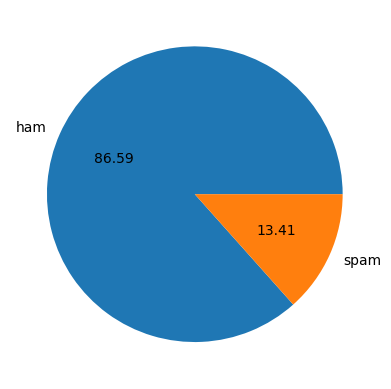

In [5]:
plt.pie(df['label'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()



In [6]:
lb = LabelEncoder()
df['label'] = lb.fit_transform(df['label'])
df.sample(5)

,label,message
4840,0,"Hmmm.... Mayb can try e shoppin area one, but ..."
2603,0,\Im at arestaurant eating squid! i will be out...
2036,0,You can jot down things you want to remember l...
1379,1,No. 1 Nokia Tone 4 ur mob every week! Just txt...
787,1,Ever thought about living a good life with a p...


In [7]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [8]:
df.drop_duplicates(keep='first', inplace=True)

In [9]:
df.shape

(5169, 2)

Spam doesn't just differ from ham by a single word;
it's the frequency of certain words,
the structure of the email, the presence of specific symbols or links, etc.

So We will need to create additional columns to avoid the problem of under-fitting
Cuz we just have 2 columns

So we will add columns such as number of tokens, Characters Count,...

In [10]:
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [11]:
df['tokens_count'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))
df['char_count'] = df['message'].apply(len)

In [12]:
df.sample(5)

,label,message,tokens_count,char_count
4755,0,Don't make life too stressfull.. Always find t...,38,157
555,0,O. Well uv causes mutations. Sunscreen is like...,12,66
2030,0,"Ugh y can't u just apologize, admit u were wro...",20,75
950,0,"Awesome, lemme know whenever you're around",9,42
1692,0,Weightloss! No more girl friends. Make loads o...,22,99


In [13]:
def clean_text(text):
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # tokenization 
    tokens = nltk.word_tokenize(text)
    #Remove stopwords (requires NLTK)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Example usage:
df['clean_message'] = df['message'].apply(clean_text)

In [14]:
df.drop('message', axis=1, inplace=True)
df.sample(5)

,label,tokens_count,char_count,clean_message
5367,0,30,135,trying figure im suppose see couple different ...
4856,0,14,58,thanks bomb date phone wanted say
831,0,31,130,hi mate rv u hav nice hol message say hello co...
403,0,10,48,none thats happening til get though
2919,0,23,86,thanx time weåõve spent geva bin mint ur baby ...


In [15]:
stemmer = SnowballStemmer("english")

In [16]:
df['clean_message'] = df['clean_message'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [17]:
df.sample(5)

,label,tokens_count,char_count,clean_message
3952,1,28,114,refus loan secur unsecur cant get credit call ...
5492,1,33,161,marvel mobil play offici ultim spiderman game ...
342,0,6,29,u hide stranger
1333,0,12,42,oh icic k lor den meet day
2819,1,24,137,interflora åòit late order interflora flower c...


In [18]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

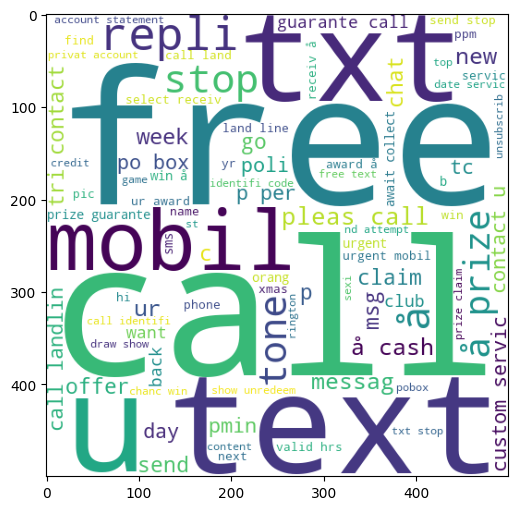

In [19]:
spam_wc = wc.generate(df[df['label'] == 1]['clean_message'].str.cat(sep=" "))
plt.figure(figsize=(10,6))
plt.imshow(spam_wc)

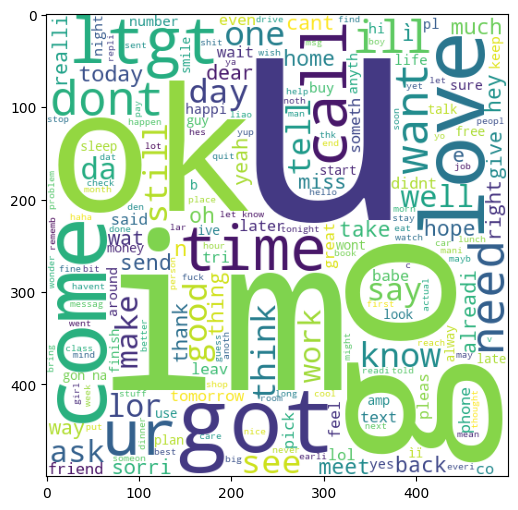

In [20]:
spam_wc = wc.generate(df[df['label'] == 0]['clean_message'].str.cat(sep=" "))
plt.figure(figsize=(10,6))
plt.imshow(spam_wc)

In [137]:
# tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
tfidf_vectorizer = TfidfVectorizer(max_features=2000)

In [138]:
X = tfidf_vectorizer.fit_transform(df['clean_message']).toarray()

In [139]:
X.shape

(5169, 2000)

In [140]:
# appending the num_character col to X

manual_features = df[['char_count', 'tokens_count']]

# Convert manual features to sparse matrix (matching the sparse X_text format)
manual_features_sparse = csr_matrix(manual_features.values)

X_final = hstack([X, manual_features_sparse])

In [141]:
X_final.shape

(5169, 2002)

In [142]:
y = df['label'].values

In [143]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X_final.toarray())

In [144]:
X_train,X_test,y_train,y_test = train_test_split(X_final,y,test_size=0.2,random_state=2)

In [145]:
gnb = GaussianNB()
bnb = BernoulliNB()

In [146]:
gnb.fit(X_train.toarray(),y_train)
y_pred1 = gnb.predict(X_test.toarray())
print(recall_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8260869565217391
[[793 103]
 [ 24 114]]
0.5253456221198156


In [147]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(recall_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8623188405797102
[[894   2]
 [ 19 119]]
0.9834710743801653


In [148]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [149]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': bnb, 
    'DT': dtc, 
    'LG': lrc,
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [150]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    recall = recall_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return recall,precision



In [151]:
recall_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_recall,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    # print("For ",name)
    # print("Recall - ",current_recall)
    # print("Precision - ",current_precision)
    
    recall_scores.append(current_recall)
    precision_scores.append(current_precision)

c:\Users\dell\Documents\Spam-Detector\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [152]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Recall':recall_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [153]:
performance_df

,Algorithm,Recall,Precision
2,NB,0.862319,0.983471
5,RF,0.811594,0.973913
8,ETC,0.847826,0.966942
9,GBDT,0.688406,0.950000
10,xgb,0.826087,0.950000
6,AdaBoost,0.666667,0.929293
3,DT,0.601449,0.912088
7,BgC,0.811594,0.888889
4,LG,0.760870,0.882353
1,KN,0.601449,0.728070


In [154]:
successful_algorithms = performance_df[performance_df['Recall'] > 0.83]['Algorithm'].tolist()

selected_clfs = {
    name: clfs[name]
    for name in successful_algorithms
}

print(selected_clfs)

{'NB': BernoulliNB(), 'ETC': ExtraTreesClassifier(n_estimators=50, random_state=2)}


In [155]:

list_of_estimators = list(selected_clfs.items())

voting = VotingClassifier(
    estimators=list_of_estimators,
    voting='soft'
)

voting.fit(X_train,y_train)


y_pred = voting.predict(X_test)
print("Recall",recall_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))



Recall 0.8695652173913043
Precision 1.0


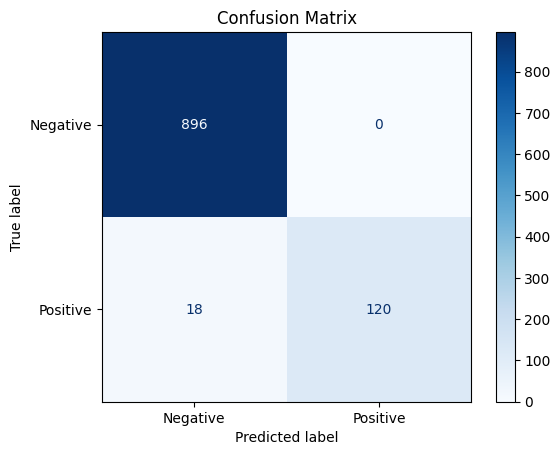

In [156]:
cm = confusion_matrix(y_test, y_pred)
# Initialize the display using the calculated matrix
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    # Pass the labels for the axes (e.g., ['Class 0', 'Class 1'])
    # Replace with your actual class names or labels
    display_labels=['Negative', 'Positive']
)

# Plot the matrix
disp.plot(cmap=plt.cm.Blues) # 'plt.cm.Blues' provides a nice color scheme

# Add a title and show the plot
plt.title('Confusion Matrix')
plt.show()

In [157]:
def preprocess_for_predict(new_messages, tfidf_vectorizer, scaler):
    """
    Applies the exact same feature engineering and scaling steps
    to new, unseen messages for model prediction.

    Args:
        new_messages (list or pd.Series): A list or Series of raw email strings.
        tfidf_vectorizer: The TfidfVectorizer object fitted on the training data.
        scaler: The MinMaxScaler object fitted on the training data.

    Returns:
        numpy.ndarray: The final, scaled feature array ready for model.predict().
    """
    
    if isinstance(new_messages, str):
        # Handle single string input by wrapping it in a list/Series
        new_messages = pd.Series([new_messages])

    # Create a temporary DataFrame for feature calculation
    temp_df = pd.DataFrame({'message': new_messages})
    
    # 1. Feature Engineering (Must be calculated on the raw message)
    temp_df['tokens_count'] = temp_df['message'].apply(lambda x: len(nltk.word_tokenize(x)))
    temp_df['char_count'] = temp_df['message'].apply(len)

    # 2. Text Cleaning and Stemming
    temp_df['clean_message'] = temp_df['message'].apply(clean_text)
    stemmer = SnowballStemmer("english")
    temp_df['clean_message'] = temp_df['clean_message'].apply(
        lambda x: ' '.join([stemmer.stem(word) for word in x.split()])
    )

    # 3. Text Vectorization (MUST USE .transform())
    X_text = tfidf_vectorizer.transform(temp_df['clean_message'])
    
    # 4. Feature Combination
    manual_features = temp_df[['char_count', 'tokens_count']]
    manual_features_sparse = csr_matrix(manual_features.values)
    
    # Combine sparse text features and sparse manual features
    X_combined = hstack([X_text, manual_features_sparse])
    
    # 5. Scaling (MUST USE .transform())
    # Convert to dense before scaling
    X_final_scaled = scaler.transform(X_combined.toarray())
    
    return X_final_scaled

In [158]:
new_emails = [
    # --- Example Ham (Non-Spam) Messages ---
    "Regarding the team meeting scheduled for tomorrow, please review the attached document before 10 AM. Agenda is collaboration status.",
    "Can you confirm receipt of the invoice #90123? We need payment processed by the end of the week. Thanks!",
    "Just checking in on the project deadline. Are we still on track for the July 15th release? Let me know if you need anything.",
    
    # --- Example Spam Messages ---
    "URGENT PRIZE NOTIFICATION!!! Click here NOW to claim your FREE MILLION DOLLARS! Limited time offer, ACT FAST: http://tinyurl.com/scam",
    "Dear valued member, YOUR ACCOUNT HAS BEEN SUSPENDED. Verify your details immediately to avoid deactivation via this link: http://phishing.net/login",
    "VIAGRA 80% OFF! Do not miss this CHANCE to get the best deal. Use code FREEBIE at checkout. GUARANTEED!!!",
    
    # --- Mixed/Tricky Message ---
    "Hello! I found a great deal on a new watch at Amazon. It's 50% off if you use this coupon code. I'll send the link separately." 
]

X_predict = preprocess_for_predict(new_emails, tfidf_vectorizer, scaler)
prediction = voting.predict(X_predict)



print(prediction)

[0 0 0 1 1 1 0]
